In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
plt.rcParams['axes.grid'] = False
plt.rcParams['savefig.transparent'] = True

In [7]:
with open('pickles/clusters.pickle','rb') as read_file:
    df = pickle.load(read_file)

In [8]:
df.head()

,1,2,3,4,5,6,kmeans,accession,country,state_region,collection_date
0,0.558287,-0.641371,-0.010158,-0.587144,0.280505,-0.241259,2,NC_045512,China,None,2019-12
1,-0.178262,-1.391519,-0.352075,2.420026,-0.895022,0.227335,1,MW599343,Bangladesh,None,2020-11-23
2,-1.937607,-0.367011,0.019485,-0.602073,0.229704,-0.375649,2,MW595907,Egypt,None,2021-01-03
3,0.308463,-1.398841,-0.346119,2.480357,-0.902998,0.231046,1,MW595908,Mexico,None,2020-09-21
4,0.308463,-1.398841,-0.346119,2.480357,-0.902998,0.231046,1,MW595909,Mexico,None,2020-08-18


In [169]:
with open('pickles/cluster_counts.pickle','rb') as read_file:
    by_country = pickle.load(read_file)

In [170]:
by_country.head()

,country,c_0,c_1,c_2,c_3,c_4,c_5,sum,0,1,2,3,4,5
0,China,2,0,108,0,0,0,110,0.018182,0.000000,0.981818,0.000000,0.000000,0.0
1,Bangladesh,337,21,15,1,2,0,376,0.896277,0.055851,0.039894,0.002660,0.005319,0.0
2,Egypt,27,12,320,0,145,0,504,0.053571,0.023810,0.634921,0.000000,0.287698,0.0
3,Mexico,0,30,4,0,0,0,34,0.000000,0.882353,0.117647,0.000000,0.000000,0.0
4,India,32,262,348,7,3,0,652,0.049080,0.401840,0.533742,0.010736,0.004601,0.0


In [21]:
# find the array that moves the refseq to the origin and apply to all datapoints
ref_seq = np.array(df.iloc[0, 0:6])

regularizer = ref_seq*-1

orig = np.array(df[[1, 2, 3, 4, 5, 6]]) 

reg = orig + regularizer

reg_df = pd.DataFrame(data = reg, columns = ['1r', '2r', '3r', '4r', '5r', '6r'])

or_reg = pd.concat([df, reg_df],
         axis = 1)

or_reg.head()

,1,2,3,4,5,6,kmeans,accession,country,state_region,collection_date,1r,2r,3r,4r,5r,6r
0,0.558287,-0.641371,-0.010158,-0.587144,0.280505,-0.241259,2,NC_045512,China,None,2019-12,0,0,0,0,0,0
1,-0.178262,-1.391519,-0.352075,2.420026,-0.895022,0.227335,1,MW599343,Bangladesh,None,2020-11-23,-0.736549,-0.750148,-0.341917,3.00717,-1.17553,0.468595
2,-1.937607,-0.367011,0.019485,-0.602073,0.229704,-0.375649,2,MW595907,Egypt,None,2021-01-03,-2.49589,0.27436,0.0296437,-0.0149288,-0.0508009,-0.13439
3,0.308463,-1.398841,-0.346119,2.480357,-0.902998,0.231046,1,MW595908,Mexico,None,2020-09-21,-0.249824,-0.75747,-0.335961,3.0675,-1.1835,0.472305
4,0.308463,-1.398841,-0.346119,2.480357,-0.902998,0.231046,1,MW595909,Mexico,None,2020-08-18,-0.249824,-0.75747,-0.335961,3.0675,-1.1835,0.472305


In [35]:
data[data['kmeans'] == 1]['4r']

1       3.00717
3        3.0675
4        3.0675
5       2.96089
10       3.0675
         ...   
3877     3.0675
3923    2.69845
3952     3.0675
3968    2.85245
3972    2.92784
Name: 4r, Length: 397, dtype: object

In [7]:
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=3, random_state=4, perplexity=63) #sqrt(n) = 63
# tsne_fit = tsne.fit_transform(or_reg[['1r', '2r', '3r', '4r', '5r', '6r']])

In [38]:
def make_dashedLines(x,y,z,ax):
    for i in range(0, len(x)):
        x_val, y_val, z_val = x[i],y[i],z[i]
        ax.plot([0,x_val],[y_val,y_val],zs=[0,0], linestyle="dashed",color="black")
        ax.plot([x_val,x_val],[0,y_val],zs=[0,0], linestyle="dashed",color="black")
        ax.plot([x_val,x_val],[y_val,y_val],zs=[0,z_val], linestyle="dashed",color="black")

In [120]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
data = or_reg[['4r', '5r', '6r', 'kmeans']]
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
colors = ['#912cee', '#f5a785', 'g', 'y', '#a4d3ee', '#90ee90']
labels = [0, 1, 2, 3, 4, 5]

for i, c, label in zip(range(len(labels)), colors, labels):
    ax.scatter(data[data['kmeans'] == i]['4r'], data[data['kmeans'] == i]['5r'], data[data['kmeans'] == i]['6r'], s=30, c=c, label=label, alpha=0.7)

# plt.axis([0, 10, 0, 10])
# plt.plot([-10, 0, -10], [0, 0, 0], 'k-', lw=2)
# plt.plot([10, 0, 0], [0, 0, 0], 'k-', lw=2)
# plt.plot([0, 0, 0], [0, 10, 0], 'k-', lw=2)
# plt.plot([0, 0, 0], [0, -10, 0], 'k-', lw=2)
# plt.plot([0, 0, 0], [0, 0, 10], 'k-', lw=2)
# plt.plot([0, 0, 0], [0, 0, -10], 'k-', lw=2)
ax.plot([0, 0],[0,0],[-10, 10],'w--',alpha=0.8, linewidth=1)
ax.plot([-10, 10],[0,0],[0,0],'w--',alpha=0.8, linewidth=1)
ax.plot([0, 0],[-10,10],[0,0],'w--',alpha=0.8, linewidth=1)


# plt.plot([0, -10, 0], [0, 10, 0], 'k-', lw=2)

# ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')

ax.set_facecolor(('#212e73'))

fig.legend()

In [119]:
def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=400)
ani.save('3dscatter.gif', writer=animation.PillowWriter(fps=20))

In [168]:
by_country.head()

,country,c_0,c_1,c_2,c_3,c_4,c_5,sum,0,1,2,3,4,5
0,China,2,0,108,0,0,0,110,0.018182,0.000000,0.981818,0.000000,0.000000,0.0
1,Bangladesh,337,21,15,1,2,0,376,0.896277,0.055851,0.039894,0.002660,0.005319,0.0
2,Egypt,27,12,320,0,145,0,504,0.053571,0.023810,0.634921,0.000000,0.287698,0.0
3,Mexico,0,30,4,0,0,0,34,0.000000,0.882353,0.117647,0.000000,0.000000,0.0
4,India,32,262,348,7,3,0,652,0.049080,0.401840,0.533742,0.010736,0.004601,0.0


In [171]:
country = by_country[['country', 'sum', 'c_0', 'c_1',
       'c_2', 'c_3', 'c_4', 'c_5']]

In [140]:
country_long = pd.melt(country, id_vars = ['country', 'sum'], value_name = 'count', var_name = 'cluster' )

In [143]:
country_long.head()

,country,sum,cluster,count
0,China,110,c_0,2
1,Bangladesh,376,c_0,337
2,Egypt,504,c_0,27
3,Mexico,34,c_0,0
4,India,652,c_0,32


In [134]:
# country_long = country_long[country_long['sum'] > 1]

In [135]:
by_country.columns

Index(['country', 'c_0', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'sum', '0', '1',
       '2', '3', '4', '5'],
      dtype='object')

In [144]:
three = country_long[(country_long.cluster == 'c_3') & (country_long.count != 0)]
five = country_long[(country_long.cluster == 'c_5') & (country_long.count != 0)]

In [145]:
three.country.unique()

array(['China', 'Bangladesh', 'Egypt', 'Mexico', 'India', 'Ghana',
       'Brazil', 'Morocco', 'Iraq', 'France', 'Netherlands', 'Hong Kong',
       'Uruguay', 'Serbia', 'Argentina', 'Pakistan', 'Dominican Republic',
       'Benin', 'Italy', 'West Bank', 'Russia', 'Japan', 'Chile', 'Peru',
       'Myanmar', 'South Korea', 'Mali', 'Tunisia', 'Spain', 'Belgium',
       'Germany', 'Taiwan', 'Bahrain', 'Cambodia', 'Ecuador', 'Canada',
       'Turkey', 'Nigeria', 'Poland', 'United Kingdom', 'Philippines',
       'Israel', 'Malta', 'Malaysia', 'Puerto Rico', 'Iran', 'Denmark',
       'Venezuela', 'Sierra Leone', 'Belize', 'Guatemala', 'Georgia',
       'Saudi Arabia', 'Jordan', 'Lebanon', 'Zambia', 'Thailand',
       'New Zealand', 'Timor-Leste', 'Czech Republic', 'Jamaica',
       'Colombia', 'Greece', 'Guam', 'Kazakhstan', 'Sri Lanka',
       'South Africa', 'Viet Nam', 'Sweden', 'Nepal', 'Finland', 'USA',
       'Australia'], dtype=object)

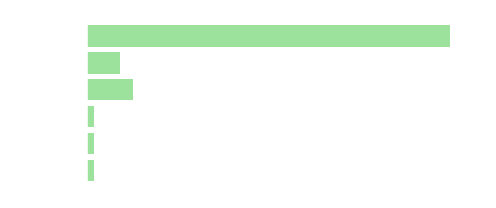

In [166]:
fig, ax = plt.subplots(figsize=(7, 3))
g = sns.barplot(data = three, y = 'country', 
                x = 'count', color = '#90ee90', 
                order = ['Ghana', 'Italy', 'India', 'Peru', 'USA', 'Bangladesh'])

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.title.set_color('white')
plt.xlim(0, 60)
plt.ylabel('Country')
plt.xlabel('')
plt.title('Geographical Cluster Distributions')
plt.tight_layout()
g.figure.savefig('three.png')

In [91]:
five.country.unique()

array(['Ghana', 'Serbia', 'Peru', 'Taiwan', 'USA'], dtype=object)

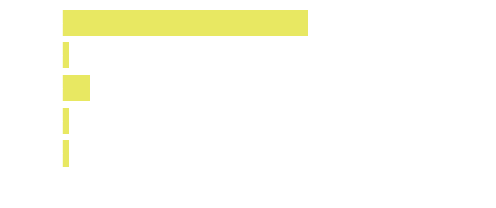

In [165]:
fig, ax = plt.subplots(figsize=(7, 3))

g = sns.barplot(data = five, y = 'country', x = 'count', color = '#ffff00', 
            order = ['USA', 'Taiwan', 'Ghana', 'Peru', 'Serbia'], alpha = 0.7)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.title.set_color('white')
plt.xlim(0, 60)
plt.ylabel('Country')
plt.xlabel('Sequence Count')
plt.title('')
plt.tight_layout()
g.figure.savefig('five2.png')

In [118]:
cl_color = {'0':'#912cee', '1':'#f5a785', '2':'g', '3':'y', '4':'#a4d3ee', '5':'#90ee90'}

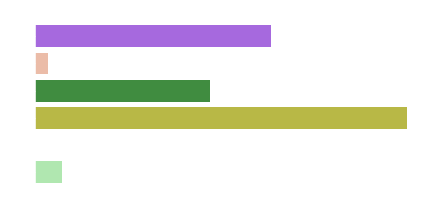

In [122]:
fig, ax = plt.subplots(figsize=(7, 3))
g = sns.barplot(data = dr, y = 'cluster', x = 'percent', palette = [cl_color[x] for x in dr.cluster], alpha = 0.8)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.title.set_color('white')
plt.ylabel('Count')
plt.xlabel('County')
plt.title('Number of Datapoints by County')
g.figure.savefig('three.png')